In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## 데이터 불러오기

In [2]:
OSdata = pd.read_excel("data/OSdata2_new.xlsx", header=0)

OSdata_160 =  OSdata[['Time_160','Y_160']][:189].to_numpy()
OSdata_170 =  OSdata[['Time_170','Y_170']][:189].to_numpy()
OSdata_180 =  OSdata[['Time_180','Y_180']][:189].to_numpy()
OSdata_190 =  OSdata[['Time_190','Y_190']][:189].to_numpy()

## sequency data preprocessing & Data reshape

In [3]:
seq_len = 10
Data_temp = OSdata_190

def generateX(a, n):
    x_train = []
    y_train = []
    for i in range(len(a)):
        x = a[i:(i + n)]
        if (i + n) < len(a):
            x_train.append(x)
            y_train.append(a[i + n])
        else:
            break
    return np.array(x_train), np.array(y_train)

x, y = generateX(Data_temp[:,1].reshape(-1, 1), seq_len)

print(x, y)

[[[0.81269999]
  [0.81221295]
  [0.81274456]
  ...
  [0.81187706]
  [0.80841352]
  [0.80971852]]

 [[0.81221295]
  [0.81274456]
  [0.81374442]
  ...
  [0.80841352]
  [0.80971852]
  [0.80986966]]

 [[0.81274456]
  [0.81374442]
  [0.8117607 ]
  ...
  [0.80971852]
  [0.80986966]
  [0.811703  ]]

 ...

 [[0.71821231]
  [0.72011762]
  [0.7198933 ]
  ...
  [0.71814947]
  [0.71503549]
  [0.71311885]]

 [[0.72011762]
  [0.7198933 ]
  [0.71954817]
  ...
  [0.71503549]
  [0.71311885]
  [0.71082269]]

 [[0.7198933 ]
  [0.71954817]
  [0.71446415]
  ...
  [0.71311885]
  [0.71082269]
  [0.70910251]]] [[0.80986966]
 [0.811703  ]
 [0.81133982]
 [0.81027   ]
 [0.80916704]
 [0.80831098]
 [0.80711362]
 [0.80960003]
 [0.80607272]
 [0.80707764]
 [0.80534685]
 [0.8045849 ]
 [0.80281453]
 [0.80686301]
 [0.80317327]
 [0.80343078]
 [0.79994263]
 [0.80319373]
 [0.80082666]
 [0.80091887]
 [0.80108646]
 [0.79644889]
 [0.79939606]
 [0.7973093 ]
 [0.79670028]
 [0.79899935]
 [0.7968226 ]
 [0.79972489]
 [0.79744539]


In [4]:
x = x.reshape(-1,seq_len,1)
y = y.reshape(-1,1)

## Split Ratio 결정
R = 0.8
train_num = int(x.shape[0] * R)

x_train = x[:train_num, :, :]
y_train = y[:train_num:, :]
x_test = x[train_num:, :, :]
y_test = y[train_num:, :]

test_num = y_test.shape[0]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(143, 10, 1) (143, 1)
(36, 10, 1) (36, 1)


## Model build

Epoch 1/150
143/143 [==============================] - 6s 5ms/step - loss: 0.2622
Epoch 2/150
143/143 [==============================] - 1s 5ms/step - loss: 0.0235
Epoch 3/150
143/143 [==============================] - 1s 5ms/step - loss: 9.8475e-04
Epoch 4/150
143/143 [==============================] - 1s 5ms/step - loss: 4.9261e-04
Epoch 5/150
143/143 [==============================] - 1s 5ms/step - loss: 4.8187e-04
Epoch 6/150
143/143 [==============================] - 1s 6ms/step - loss: 4.8756e-04
Epoch 7/150
143/143 [==============================] - 1s 5ms/step - loss: 4.8753e-04
Epoch 8/150
143/143 [==============================] - 1s 5ms/step - loss: 4.8859e-04
Epoch 9/150
143/143 [==============================] - 1s 5ms/step - loss: 4.8693e-04
Epoch 10/150
143/143 [==============================] - 1s 5ms/step - loss: 4.8846e-04
Epoch 11/150
143/143 [==============================] - 1s 6ms/step - loss: 4.6891e-04
Epoch 12/150
143/143 [==============================] - 1s 7

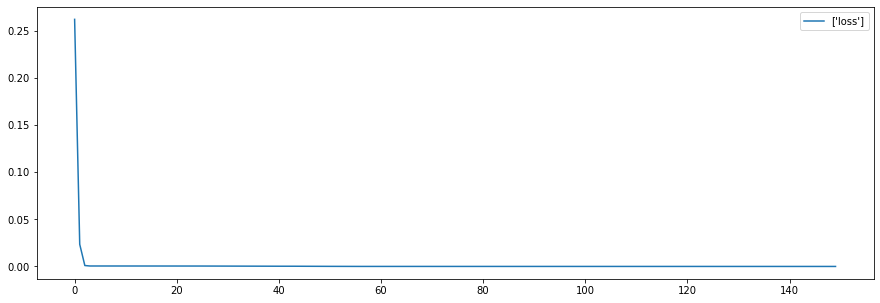

36/36 [==============================] - 1s 3ms/step


In [5]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, SimpleRNN, Dropout, Conv1D, GRU
from tensorflow.keras.callbacks import EarlyStopping

#시드 고정
import tensorflow as tf
tf.random.set_seed(2022)

# model build
def LSTM_modeling():
    xInput = Input(batch_shape=(None,x_train.shape[1], x_train.shape[2]))
    xLstm_1 = LSTM(seq_len, return_sequences = True)(xInput)
    xOutput = LSTM(1, return_sequences = False)(xLstm_1)   # 출력의 차원 수를 맞춰야 하므로

    model = Model(xInput, xOutput)
    model.compile(loss='mse', optimizer='adam')
    return model

def RNN_modeling():
    model = Sequential([
    SimpleRNN(1, input_shape=[None, 1])])
    
    model.compile(loss='mse', optimizer='adam')
    return model

def GRU_modeling():
    model = Sequential()
    model.add(GRU(units = seq_len ,return_sequences=True, activation = 'tanh'))
    model.add(GRU(units = seq_len , activation = 'tanh'))
    model.add(Dense(units=1))
    
    model.compile(loss='mse', optimizer='adam')
    return model

# 학습 모델 선택
#model = RNN_modeling()
model = LSTM_modeling()
#model = GRU_modeling()
history = model.fit(x_train, y_train, epochs=150, batch_size=1,verbose=1)

# loss 시각화
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], label=['loss'])
plt.legend()
plt.show()

# 예측
y_hat = model.predict(x_test.astype(float), batch_size=1)

In [6]:
print(y_hat.shape)

def MAPE(y_pred, y_test):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

print("예측값 MAPE: ", MAPE(y_hat, y_test))

(36, 1)
예측값 MAPE:  0.4174451227505222


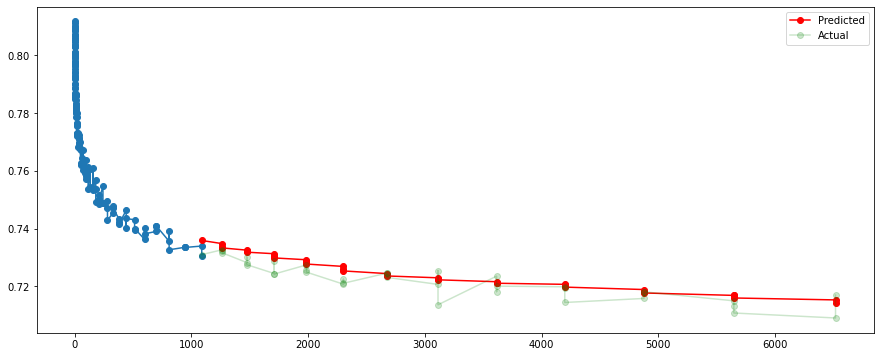

In [7]:
import matplotlib.pyplot as plt

x_time = Data_temp[:,0]

a_axis = x_time[:train_num]
b_axis = x_time[train_num:train_num+test_num] 


plt.figure(figsize=(15,6))
plt.plot(a_axis, y_train.reshape(train_num,), 'o-')
plt.plot(b_axis, y_hat.reshape(test_num,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(test_num,), 'o-', color='green', alpha=0.2, label='Actual')
#plt.xscale("log")
plt.legend()
plt.show()

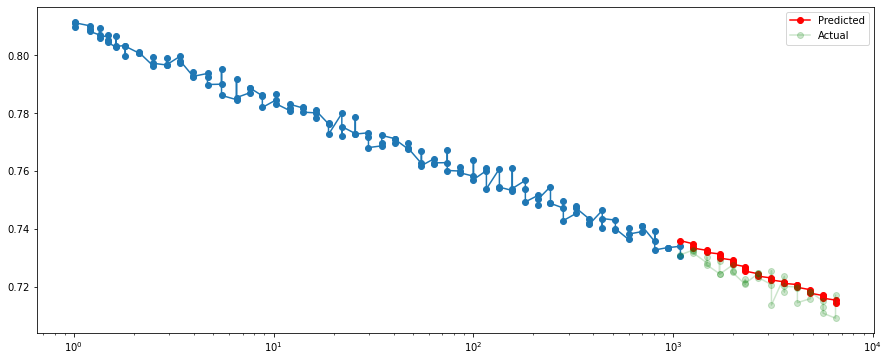

In [8]:
plt.figure(figsize=(15,6))
plt.plot(a_axis, y_train.reshape(train_num,), 'o-')
plt.plot(b_axis, y_hat.reshape(test_num,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(test_num,), 'o-', color='green', alpha=0.2, label='Actual')
plt.xscale("log")
plt.legend()
plt.show()

# 세미로그스케일 구간 10배 예측

1/1 [==============================] - 0s 14ms/step


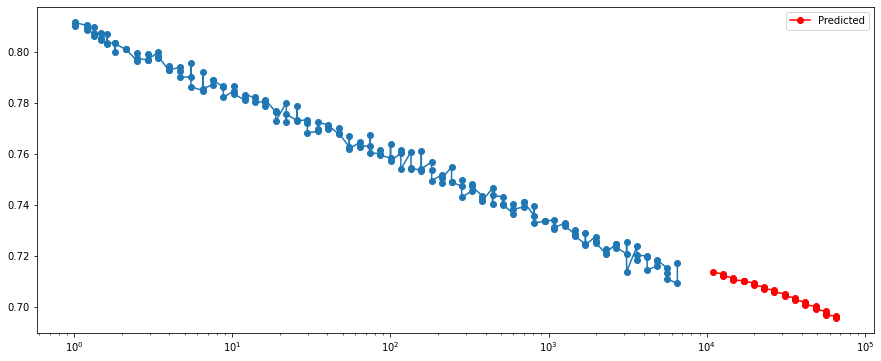

[0.71354711 0.71277863 0.71245402 0.71198595 0.71134806 0.7107349
 0.71039593 0.71017623 0.7100724  0.71001011 0.7092154  0.70873165
 0.70828938 0.70784324 0.70740223 0.7069751  0.7065531  0.70610982
 0.70563674 0.70512784 0.7045843  0.70406866 0.70354789 0.70301586
 0.70247144 0.70191276 0.70133787 0.70074582 0.70013779 0.69951546
 0.69888031 0.69823343 0.69757032 0.69689006 0.69619197 0.69547588]


In [9]:
y_list= np.array([y[-1]])
x_output = x[-1:]

for _ in range(test_num):
    x_output = np.delete(x_output,0) #첫번째 데이터 삭제하고
    x_output = np.append(x_output,y_list[-1]) # 예측된 새 데이터 추가
    x_output = np.reshape(x_output,(1,-1,1))
    y_input = y[:,:]
    # 예측
    y_output = model.predict(x_output.astype(float), batch_size=1)
    
    y_list=np.concatenate((y_list, y_output), axis=0)
y_list = np.delete(y_list,0)

a_axis = x_time[:train_num+test_num]
b_axis = x_time[train_num:train_num+test_num] * 10 

plt.figure(figsize=(15,6))
plt.plot(a_axis, y_input, 'o-')
plt.plot(b_axis, y_list, 'o-', color='red', label='Predicted')

plt.xscale("log")
plt.legend()
plt.show()

print(y_list)